<a href="https://colab.research.google.com/github/WilliamHallPortfolio/ACS_Juvenile_Justice_Project/blob/main/ACS%20Flash%20Report%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACS Flash Report Project <br>
Based on updated data (October 4th 2024) from NYC Open Data.

Dataset and data definitions can be found here: <br>
https://data.cityofnewyork.us/City-Government/Monthly-Flash-Report-indicators/2ubh-v9er/about_data

The Flash report provides monthly performance data on key ACS child welfare, child care, and juvenile justice functions such as children using vouchers for child care, child protective caseloads, and the number of admissions to detention. Each row of data in the Excel file posted to Open Data is a distinct measure in the Flash Report.The columns are the month of the data. Data are updated semiannually in September and April using data from queries of administrative data systems and data provided directly from program areas.

This project focuses on Juvenile Justice and detention rates of the youth residing in New York City. After examining the key features of the dataset, I will create an ARIMA model to attempt to predict youth detention levels in fiscal year 2025. This project is applicable to determining budgets for upcoming fiscal years and addressing capacity concerns in the event of an unforeseen influx or decrease in new clients.



## Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/WilliamHallPortfolio/ACS_Juvenile_Justice_Project.git

Cloning into 'ACS_Juvenile_Justice_Project'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 113 (delta 56), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 9.56 MiB | 8.01 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [3]:
df = pd.read_csv("/content/ACS_Juvenile_Justice_Project/data/Open_Data_FLASH_Jan_2015_-_June_2024.csv")
df.head()

,Indicators,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,...,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
0,Children using vouchers for child care,"67,674","66,196","66,860","66,710","67,319","68,736","67,674","67,620","66,734",...,"65,702","66,975","68,445","70,536","72,055","74,214","74,935","76,189","76,591","77,216"
1,Children using low income vouchers for child care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"25,700","27,137","29,015","30,732","32,217","34,545","36,401","38,750","40,225","42,176"
2,SCR intakes,"5,470","4,879","6,545","5,261","5,799","4,962","3,958","3,939","4,221",...,"4,568","5,468","5,184","4,952","5,584","5,074","5,940","5,180","5,937","4,755"
3,Consolidated Investigations,"4,944","4,353","5,917","4,671","5,205","4,380","3,480","3,471","3,717",...,"3,142","3,572","3,504","3,303","3,597","3,390","3,826","3,301","3,979","3,268"
4,CARES Cases,52,46,75,58,58,44,10,8,25,...,746,"1,161","1,072",996,"1,290","1,063","1,281","1,101","1,193",727


In [4]:
# Printing dataset dimensions
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  86
Number of columns:  115


In [5]:
# Setting index to row headers
df.set_index('Indicators', inplace=True)
df.head()

,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,...,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
Indicators,,,,,,,,,,,,,,,,,,,,,
Children using vouchers for child care,"67,674","66,196","66,860","66,710","67,319","68,736","67,674","67,620","66,734","67,266",...,"65,702","66,975","68,445","70,536","72,055","74,214","74,935","76,189","76,591","77,216"
Children using low income vouchers for child care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"25,700","27,137","29,015","30,732","32,217","34,545","36,401","38,750","40,225","42,176"
SCR intakes,"5,470","4,879","6,545","5,261","5,799","4,962","3,958","3,939","4,221","5,725",...,"4,568","5,468","5,184","4,952","5,584","5,074","5,940","5,180","5,937","4,755"
Consolidated Investigations,"4,944","4,353","5,917","4,671","5,205","4,380","3,480","3,471","3,717","5,110",...,"3,142","3,572","3,504","3,303","3,597","3,390","3,826","3,301","3,979","3,268"
CARES Cases,52,46,75,58,58,44,10,8,25,63,...,746,"1,161","1,072",996,"1,290","1,063","1,281","1,101","1,193",727


In [6]:
# Transposing dataframe
df = df.T
# Head of df
df.head()

Indicators,Children using vouchers for child care,Children using low income vouchers for child care,SCR intakes,Consolidated Investigations,CARES Cases,Total Consolidated Investigations and CARES Cases,Indication Rate,% of Cases (Investigations and CARES) w/ Indicated Investigations,CPS caseload CW,CPS caseload BX,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
January 2015,"67,674",NaN,"5,470","4,944",52,"4,996",39.8%,NaN,11.6,12.4,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
February 2015,"66,196",NaN,"4,879","4,353",46,"4,399",40.1%,NaN,11.2,12.1,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
March 2015,"66,860",NaN,"6,545","5,917",75,"5,992",39.2%,NaN,11.5,12.7,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
April 2015,"66,710",NaN,"5,261","4,671",58,"4,729",38.0%,NaN,11.2,12.8,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
May 2015,"67,319",NaN,"5,799","5,205",58,"5,263",37.8%,NaN,11.1,12.2,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106


Converting index to Datetime

In [7]:
df_reset = df.reset_index()
df_reset['index'] = pd.to_datetime(df_reset['index'], format='%B %Y').dt.strftime('%Y-%m')
df_reset.set_index('index', inplace=True)
df = df_reset

Converting objects to numeric dtypes

In [8]:
df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce') if x.name != 'Indicators' else x)
df.head()

Indicators,Children using vouchers for child care,Children using low income vouchers for child care,SCR intakes,Consolidated Investigations,CARES Cases,Total Consolidated Investigations and CARES Cases,Indication Rate,% of Cases (Investigations and CARES) w/ Indicated Investigations,CPS caseload CW,CPS caseload BX,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
index,,,,,,,,,,,,,,,,,,,,,
2015-01,67674,NaN,5470,4944,52,4996,NaN,NaN,11.6,12.4,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
2015-02,66196,NaN,4879,4353,46,4399,NaN,NaN,11.2,12.1,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
2015-03,66860,NaN,6545,5917,75,5992,NaN,NaN,11.5,12.7,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
2015-04,66710,NaN,5261,4671,58,4729,NaN,NaN,11.2,12.8,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
2015-05,67319,NaN,5799,5205,58,5263,NaN,NaN,11.1,12.2,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106


Stripping extra characters/spaces from column names

In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['Children using vouchers for child care',
       'Children using low income vouchers for child care', 'SCR intakes',
       'Consolidated Investigations', 'CARES Cases',
       'Total Consolidated Investigations and CARES Cases', 'Indication Rate',
       '% of Cases (Investigations and CARES) w/ Indicated Investigations',
       'CPS caseload CW', 'CPS caseload BX', 'CPS caseload BK',
       'CPS caseload MN', 'CPS caseload QN', 'CPS caseload SI',
       'CPS caseload OSI', 'OSI Total', 'OSI Foster Care', 'OSI Day Care',
       'Article 10 filings Total', 'Court Ordered Supervision',
       'Court Order Removals', 'Other Filing Outcomes', 'Post-Filing Removals',
       'Pre-Filing Emergency Removals', 'Total new prevention cases',
       'General Prevention new cases', 'FTR new cases', 'EBM new cases',
       'Special Medical new cases', 'Total Children's Center Population',
       '0 - 3 yrs. Children's Center', '4 - 6 yrs. Children's Center',
       '7 - 10 yrs. Children's Ce

Selecting columns that are pertinent to Juvenile Justice / Close to Home (CTH) programs

In [33]:
df_jj = df[['JD placements','Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention',
       'Population Specialized Juvenile detention',
       'Population Non-Secure Detention', 'Average daily population AO',
       'Average daily population JD', 'Average daily population JO',
       'Average daily population pre-Raise the Age',
       'Average daily population Other', 'NSP admits', 'LSP admits',
       'CTH admissions Total', 'NSP General Male', 'NSP General Female',
       'NSP Specialized Male', 'NSP Specialized Female', 'NSP TFCO',
       'NSP Other', 'LSP Male', 'LSP Female',
       'LSP Intensive Support Male/Female', 'Total CTH', 'NSP Total',
       'LSP Total', 'Release from CTH Placement to Aftercare',
       'CTH Aftercare Census']]

In [11]:
df_jj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2015-01 to 2024-06
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   JD placements                               113 non-null    float64
 1   Detention Admissions                        114 non-null    int64  
 2   Releases from Detention                     114 non-null    int64  
 3   Population in Secure Detention              114 non-null    int64  
 4   Population Specialized Juvenile detention   70 non-null     float64
 5   Population Non-Secure Detention             114 non-null    int64  
 6   Average daily population AO                 77 non-null     float64
 7   Average daily population JD                 90 non-null     float64
 8   Average daily population JO                 90 non-null     float64
 9   Average daily population pre-Raise the Age  72 non-null     float64
 10  Average d

Checking columns for missing values

In [12]:
# Checking how many missing values in each attribute
df_jj.isnull().sum()

,0
Indicators,
JD placements,1
Detention Admissions,0
Releases from Detention,0
Population in Secure Detention,0
Population Specialized Juvenile detention,44
Population Non-Secure Detention,0
Average daily population AO,37
Average daily population JD,24
Average daily population JO,24


In [13]:
# Filling Nans with zeros
df_jj.fillna(0,inplace=True)

# Checking number of Nans after imputing
df_jj.isnull().sum().sum()

0

In [14]:
# Creating 'Month' and 'Fiscal Year' Columns
# July month 1 - June month 12
df_jj['Month'] = pd.to_datetime(df_jj.index, format='%Y-%m')
df_jj['Fiscal Year'] = df_jj['Month'].apply(lambda x: x.year + 1 if x.month >= 7 else x.year)
df_jj['Fiscal Month'] = df_jj['Month'].dt.month.apply(lambda x: x - 6 if x >= 7 else x + 6)


## Visualiztions
The visualizations created here will examine **Fiscal Years 2022, 2023, and 2024** <br>
for simplicity


In [15]:
# Selecting FY22, FY23, and FY24
df_years = df_jj[df_jj['Fiscal Year'].isin([2022,2023,2024])]

In [16]:
df_years.drop(columns=['JD placements','Population Specialized Juvenile detention','NSP Specialized Female',
                        'NSP TFCO','NSP Other','LSP Intensive Support Male/Female',
                        'Average daily population pre-Raise the Age'],inplace=True)

In [17]:
df_years.columns

Index(['Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention', 'Population Non-Secure Detention',
       'Average daily population AO', 'Average daily population JD',
       'Average daily population JO', 'Average daily population Other',
       'NSP admits', 'LSP admits', 'CTH admissions Total', 'NSP General Male',
       'NSP General Female', 'NSP Specialized Male', 'LSP Male', 'LSP Female',
       'Total CTH', 'NSP Total', 'LSP Total',
       'Release from CTH Placement to Aftercare', 'CTH Aftercare Census',
       'Month', 'Fiscal Year', 'Fiscal Month'],
      dtype='object', name='Indicators')

In [36]:
# Selecting columns for visualizations
columns = ['Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention', 'Population Non-Secure Detention',
       'Average daily population AO', 'Average daily population JD',
       'Average daily population JO',
       'NSP admits', 'LSP admits', 'CTH admissions Total',
       'Total CTH', 'NSP Total', 'LSP Total',
       'Release from CTH Placement to Aftercare']

**Months in Fiscal Years:** <br>
Month 1: July <br>
Month 12: June <br>

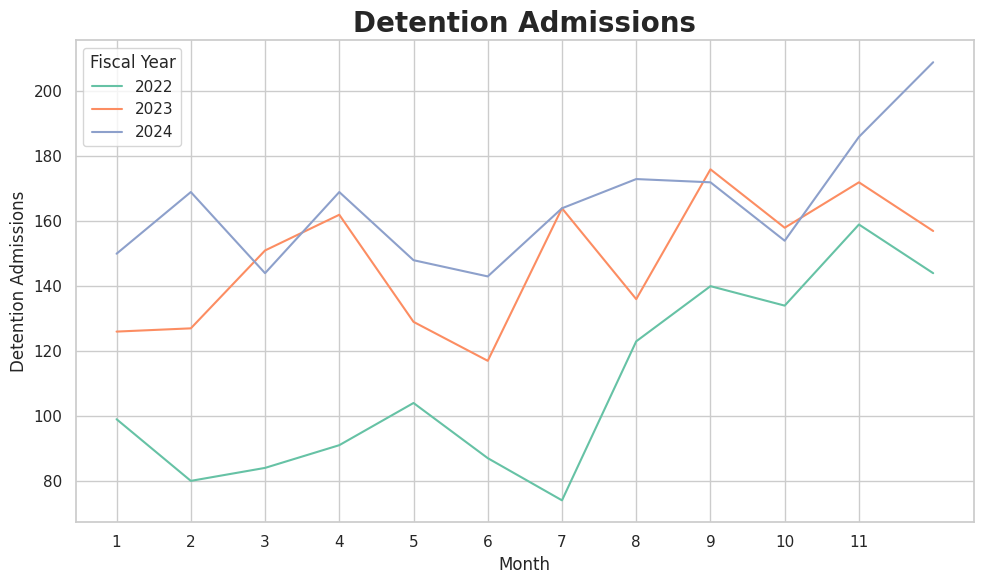

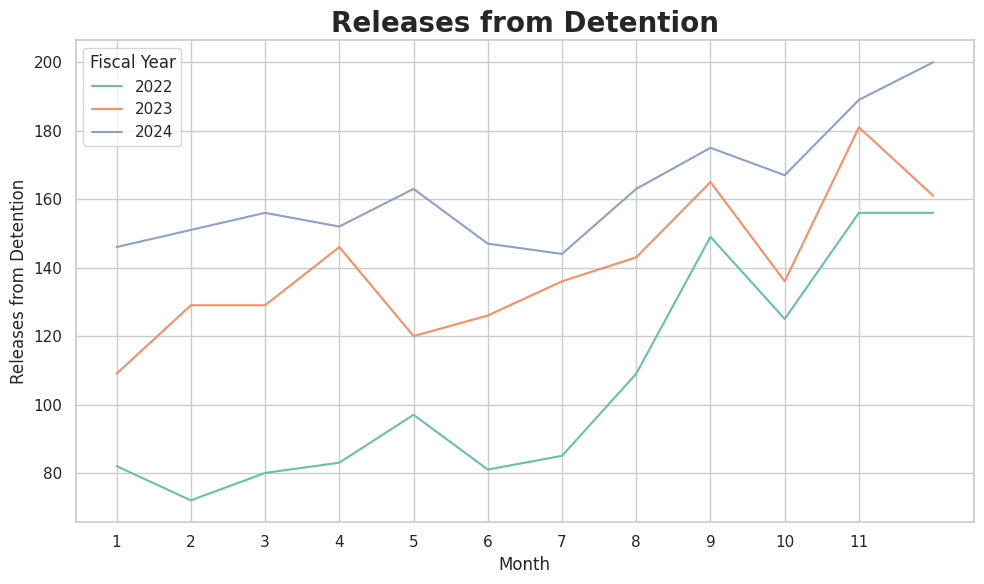

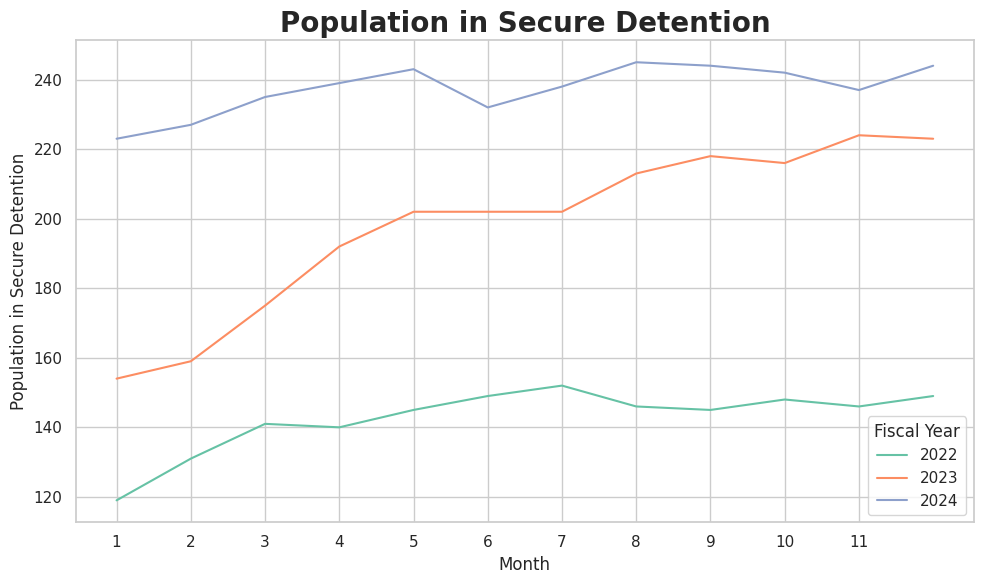

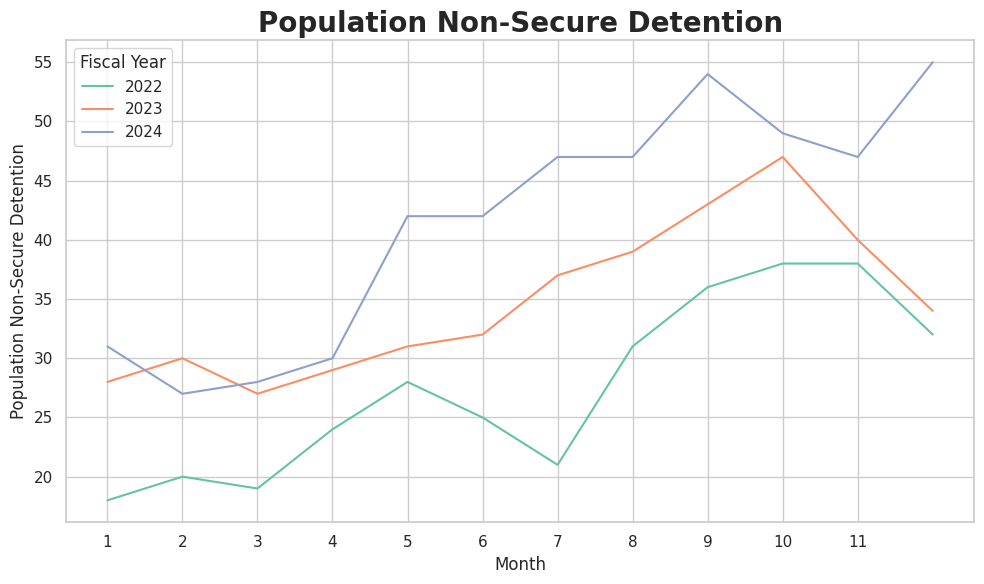

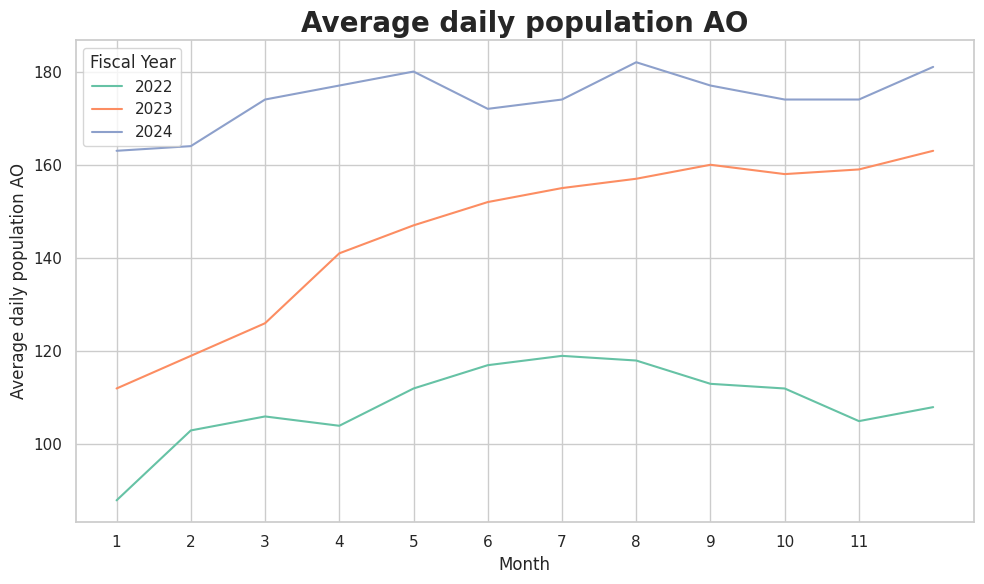

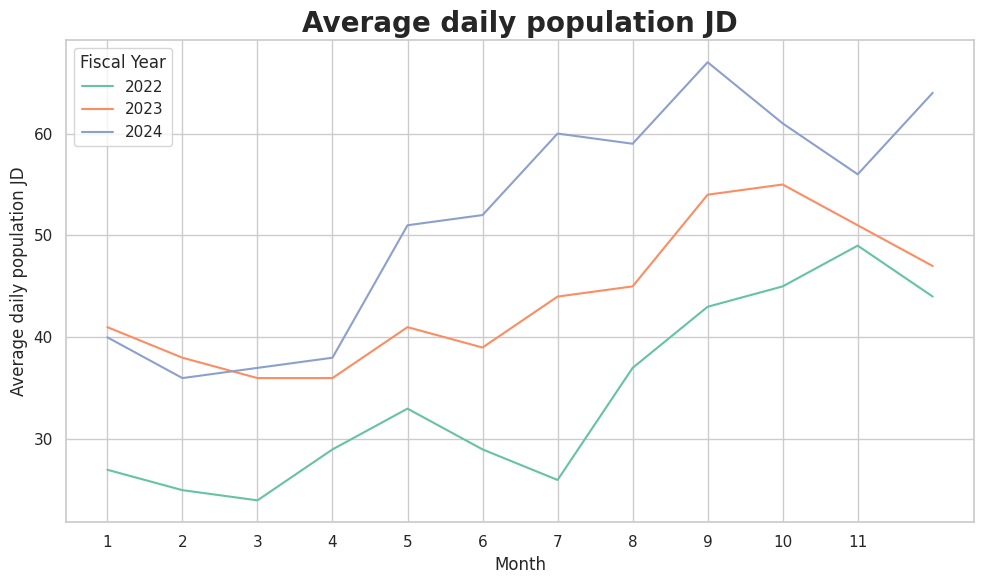

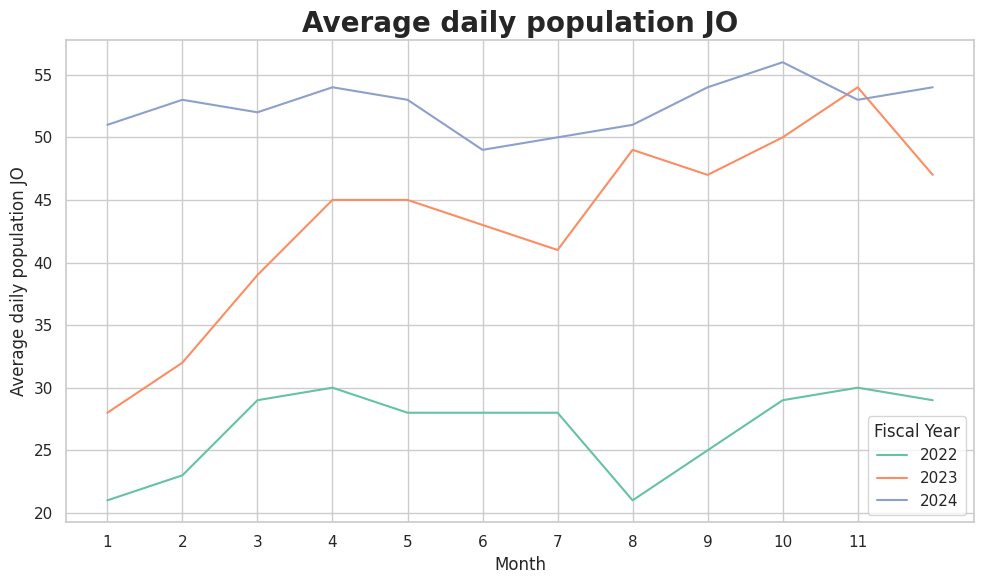

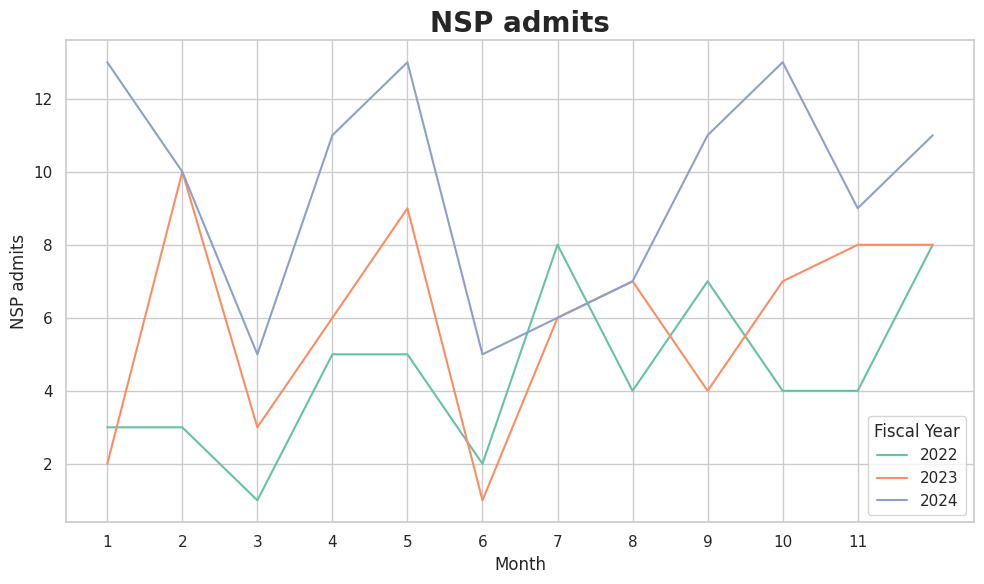

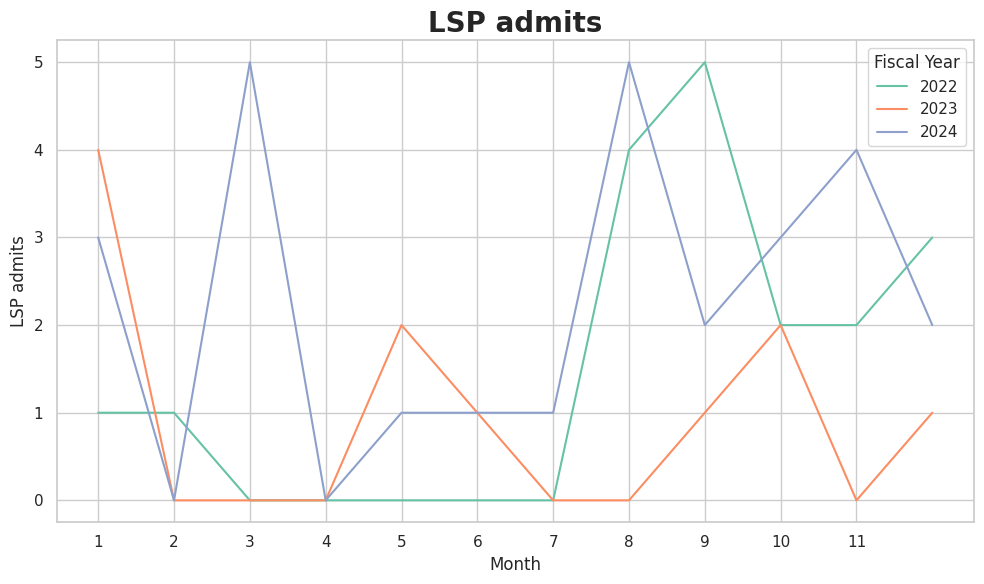

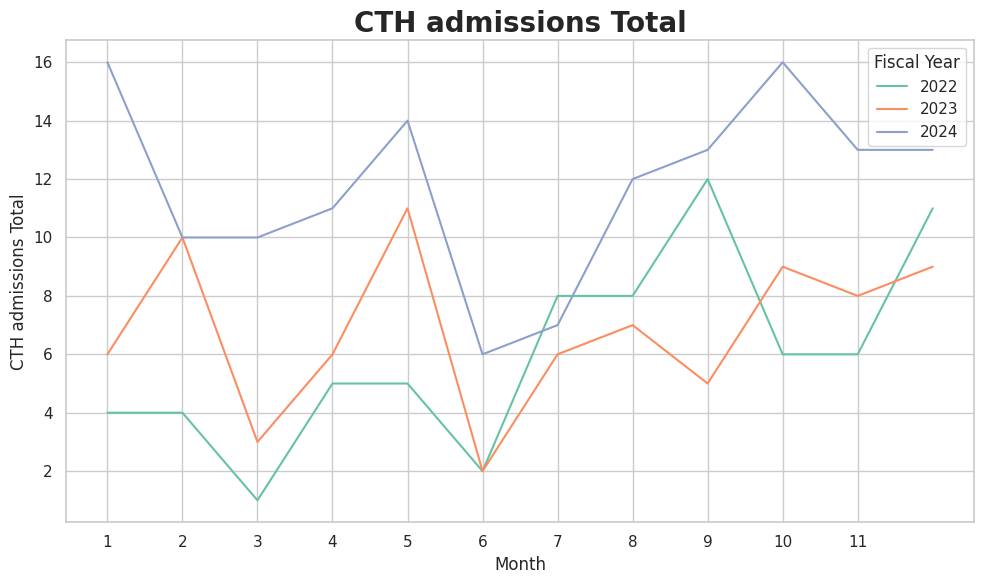

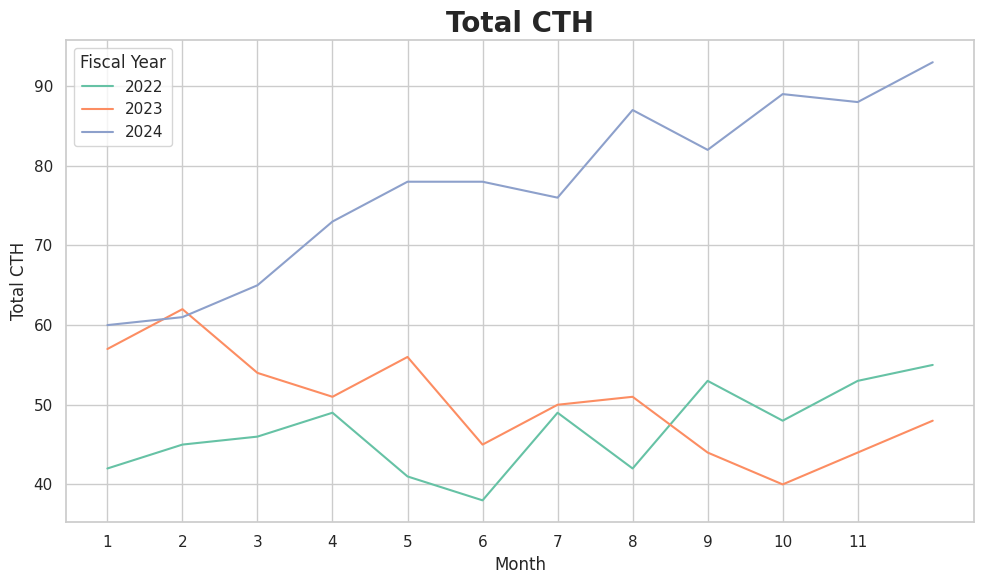

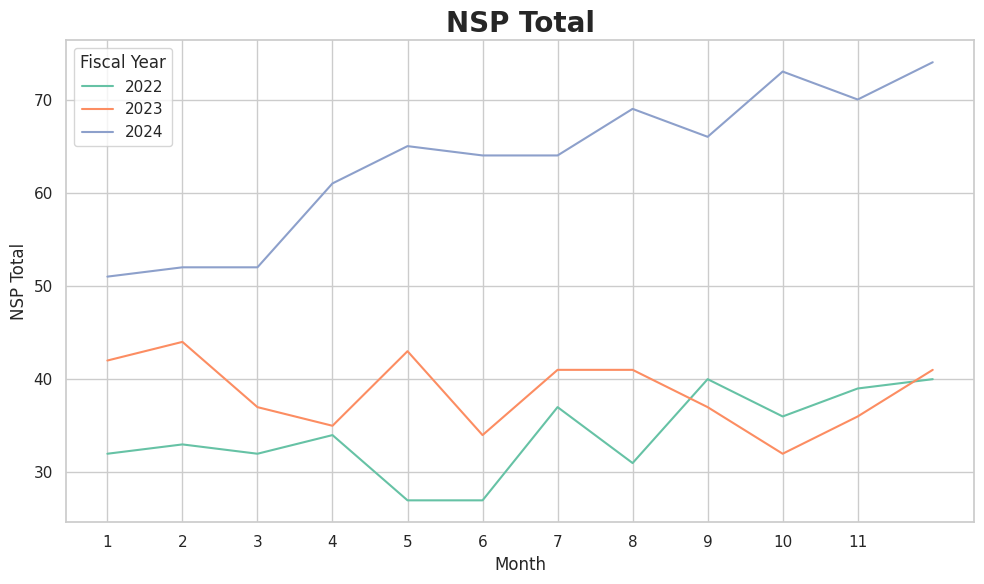

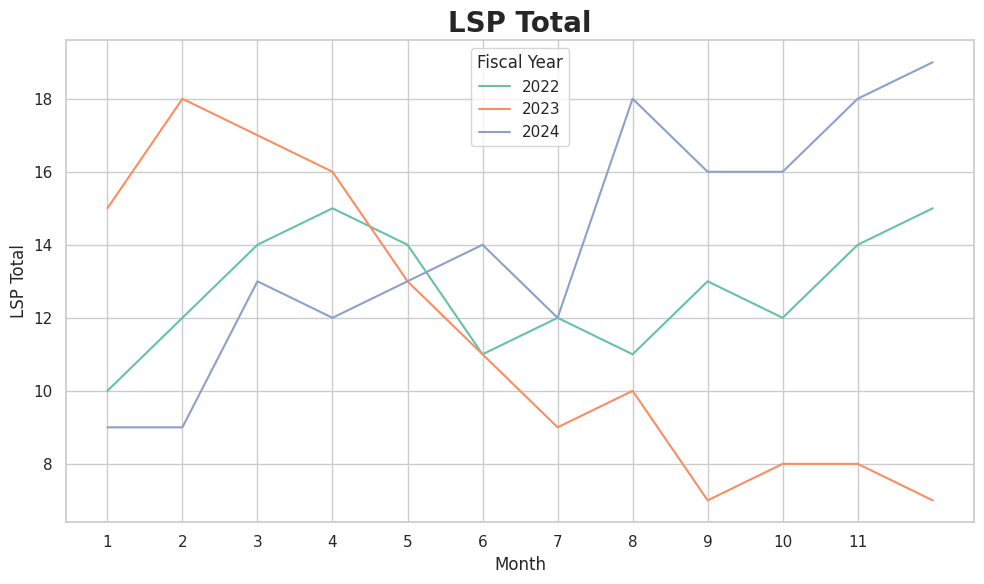

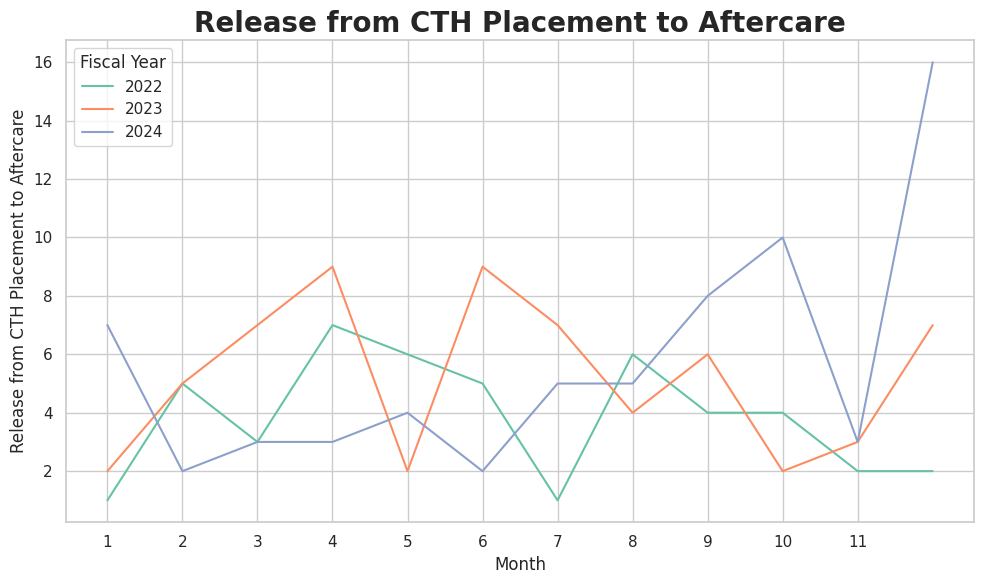

In [37]:
for i in columns:
  palette = sns.color_palette("Set2")
  sns.set(style="whitegrid")
  plt.figure(figsize=(10, 6))
  sns.lineplot(x='Fiscal Month',y= i,hue='Fiscal Year',data=df_years, palette = palette)

  plt.title(i,fontsize=20,fontweight='bold')
  plt.xticks(range(1,12,1))
  plt.xlabel('Month')
  plt.ylabel(i)
  plt.tight_layout()

## ARIMA (Autoregressive Integrated Moving Average) Model Building
### Time Series Forcasting

In this section I will try to predict how many youths will enter the Juvenile Justice system in fiscal year 2025. The ARIMA model is designed to forcast a time-series by using past data. A time series is metric that records data over regular time intervals.
<br>
**NOTE:** I will be using all years in the dataset to make the most accurate forecast possible.

#### Data Preparation

In [20]:
# Selecting 'Detention Admissions' as our target variable
data = df_jj[['Month','Detention Admissions']]
data.set_index('Month',inplace=True)

# Displaying summary statistics
data.describe()

Indicators,Detention Admissions
count,114.000000
mean,150.631579
std,46.210803
min,46.000000
25%,123.000000
50%,151.500000
75%,179.750000
max,258.000000


<Axes: xlabel='Month'>

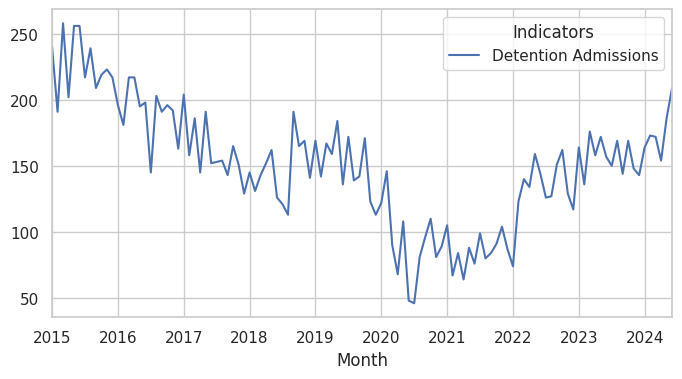

In [21]:
# Plotting the target variable
data.plot(figsize=(8,4))

<Axes: ylabel='Density'>

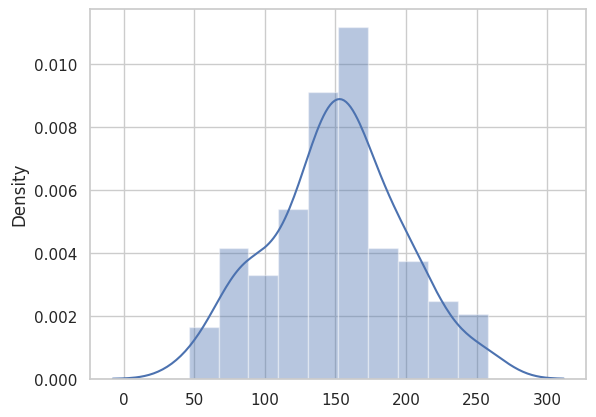

In [22]:
# Checking distribution
sns.distplot(data)

<Axes: xlabel='Month'>

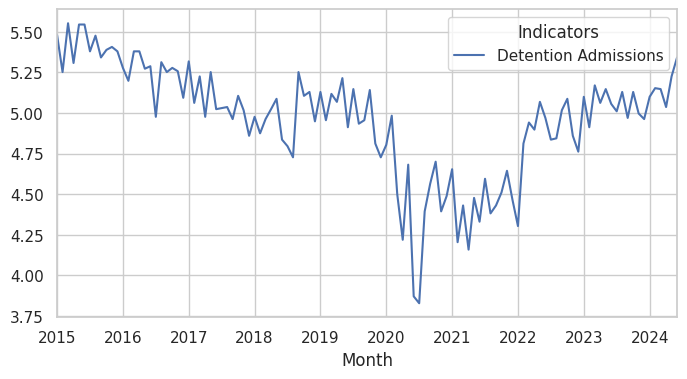

In [23]:
# Applying the log of past values to control the varience across time
import numpy as np
data_log = np.log(data)
data_log.plot(figsize=(8,4))

<Axes: ylabel='Density'>

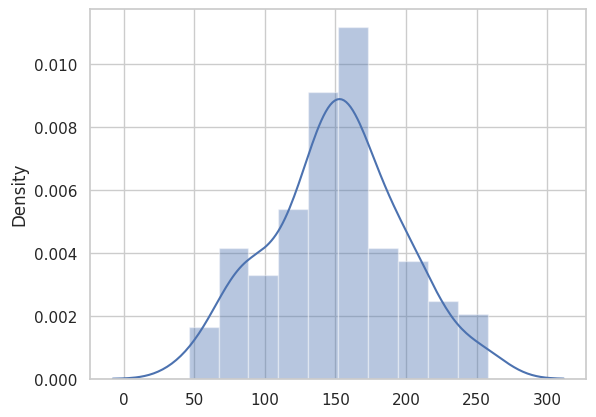

In [24]:
# Checking distribution
sns.distplot(data)

**NOTE:** I will choose not to apply the logarithm to the dataset. We can observe that taking the log of the data in our dataset skews the distribution of data points to the right a bit.

### Splitting data to train and test sets <br>
80% Training 20% Testing

In [25]:
# Splitting based on a specific date
train_size = int(len(data) * 0.8)  # Use 80% for training
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

print('Training set shape: ',train_data.shape)
print('Testing set shape: ',test_data.shape)

Training set shape:  (91, 1)
Testing set shape:  (23, 1)


## ARMA Model Workflow
1. Check for Stationarity
2. ACF plot
3. PACF plot

#### 1. Checking for Stationarity

Stationarity implies that the statistical properties (mean, variance) of the series do not change over time. <br>
 The most common method to check for stationarity is the **Augmented Dickey-Fuller (ADF) Test.** <br>
 If the p value is **lower than 0.05**, we can safely assume that our data is stationary.   

In [26]:
# Checking if time series data is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.6270907808511292
p-value: 0.4690138782632207
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}


After using the **(ADF) test**, we see from the results that our data is not stationary

In order to use ARIMA with series data that is non-stationary, we must apply differencing: <br>
Differencing a time series is a technique that involves subtracting the current value of <br>
a time series from its previous value, or from a lagged value.

In [27]:
# Applying differencing on train data
train_data_diff = train_data.diff().dropna()
train_data_diff.head()

Indicators,Detention Admissions
Month,
2015-02-01,-49.0
2015-03-01,67.0
2015-04-01,-56.0
2015-05-01,54.0
2015-06-01,0.0


Checking for stationarity on differenced data:

In [28]:
result = adfuller(train_data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.910005899471691
p-value: 3.971331529638618e-12
Critical Values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}


#### 2. ACF plot
After differencing, we use the ACF plot to identify MA terms (q) by looking for abnormal spikes after lag 1

Text(0.5, 1.0, 'Autocorrelation Function (ACF) Plot')

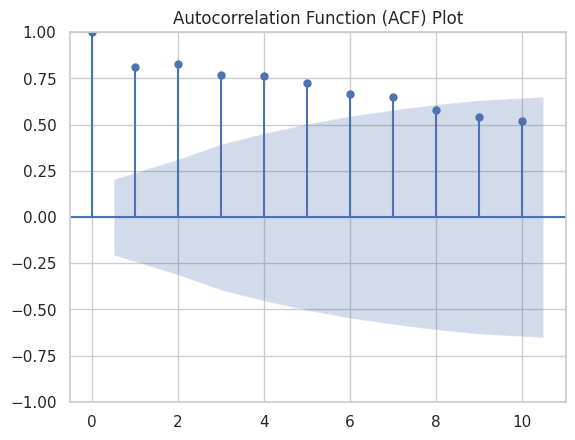

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(train_data, lags=10)
plt.title('Autocorrelation Function (ACF) Plot')

Interpreting the ACF Plot: <br>
* The y-axis shows the autocorrelation values (ranging from -1 to 1).
* The x-axis shows the lag number.
* Any significant spikes *outside* the blue confidence bands indicate strong autocorrelation at that specific lag.

#### PACF plot
PACF plots determine the AR terms (p).
Significant spikes indicate AR lags.

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF) Plot')

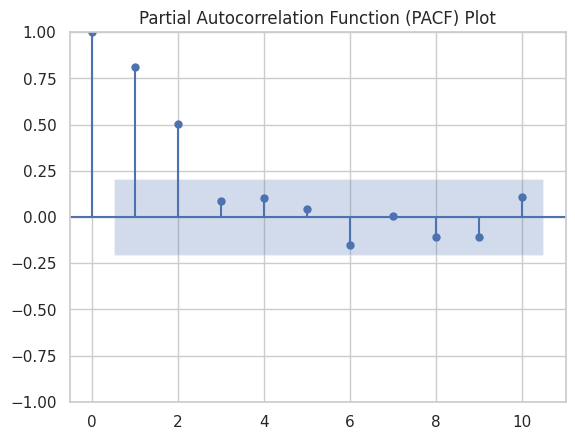

In [30]:
# PACF plot
plot_pacf(train_data, lags=10)
plt.title('Partial Autocorrelation Function (PACF) Plot')

Interpreting the PACF Plot:<br>
* The y-axis shows the partial autocorrelation values (ranging from -1 to 1).
* The x-axis shows the lag number.
* Significant spikes outside the blue confidence bands indicate a meaningful partial autocorrelation at that specific lag. These can help you determine the number of autoregressive (AR) terms to include in models like ARIMA.

ARMIA Parameters: <br>
p: The order of the AutoRegressive (AR) term. It refers to the number of lag observations included in the model. <br>
d: The order of differencing needed to make the series stationary. (I)<br>
q: The order of the Moving Average (MA) term. It refers to the number of lagged forecast errors in the prediction equation.

## AUTO ARIMA
In this project we will be automating the ARIMA models using a Grid Search method called Auto ARIMA. This process attempts to search for the best model parameters for the best accuracy.
<br>
From observing the differencing demonstration above, we see how differencing impacts the data. Using Auto ARIMA, we will create 3 different models with different differencing counts (0,1,2) and observe the performance of each.   

In [34]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00


# OUTPUT of CELL BELOW
The result shown after running the code cell below displays the Auto Arima performing the search for the best model. After displaying the best p and q parameters for each value of "d" (how many times differenced),the output will display the raw forecast predictions.
<br>
<br>
Under the predictions, a visualization will appear that displays the actual data from the test set and the model's prediction  for the same period. Additionally, the model will provide a future prediction of detainee admissions in fiscal year 2025.
<br>
<br>
Underneath the aforementioned visual, we see the MAE (Mean Squared Error) and the RMSE (Root Mean Squared Error) scores that evaluate each models performance.
**NOTE** The lower the score, the better fit of the model to the test data.
<br>
<br>
Lastly, we are greeted with another visual called the Diagnostics Plots that provides the examiner with residual, histogram, correlogram, and Q-Q plots.
<br>
What the Diagnostics Plot Show:
1. Standardized residuals: This plot shows whether the residuals are randomly distributed. Ideally, they should have no pattern.
2. Histogram plus estimated density: This plot shows the distribution of residuals. It should look like a normal distribution.
3. Normal Q-Q plot: This plot checks if the residuals follow a normal distribution. Points should lie along the line if residuals are normally distributed.
4. Correlogram (ACF plot): This shows if there is any autocorrelation in the residuals. Ideally, there should be no significant lags.


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=947.711, Time=3.33 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=975.443, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=871.180, Time=2.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=923.362, Time=1.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1180.593, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=873.432, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=862.389, Time=5.20 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=862.860, Time=4.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=868.985, Time=2.40 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=947.590, Time=2.60 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=839.734, Time=0.90 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=847.901, Time=0.26 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=841.596, Time=3.07 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=846.164, Time=1.28 sec
 ARIMA(3,0,0)(2,0,0)[12] interce

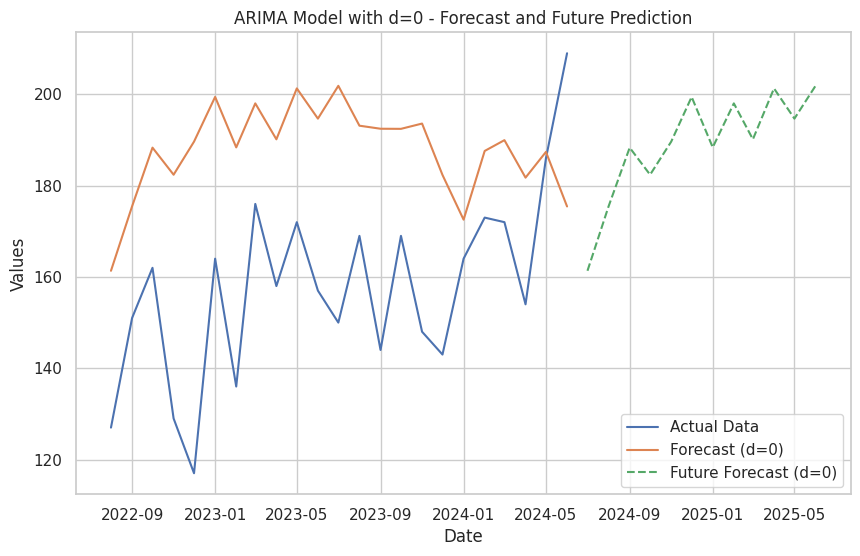



Model with d=0: 
MAE: 32.90400568675007
RMSE: 36.534429507959715

Plotting diagnostics for model with d=0:


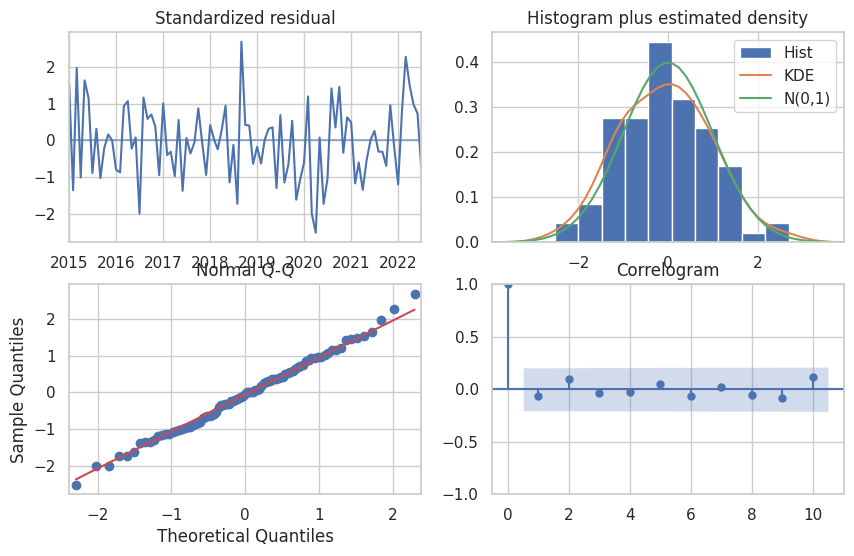

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=864.575, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=868.008, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=837.644, Time=1.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=834.148, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=866.175, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=832.647, Time=1.26 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=833.879, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=832.765, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=832.608, Time=0.11 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=834.008, Time=0.25 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=834.225, Time=0.27 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=832.630, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=836.483, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   

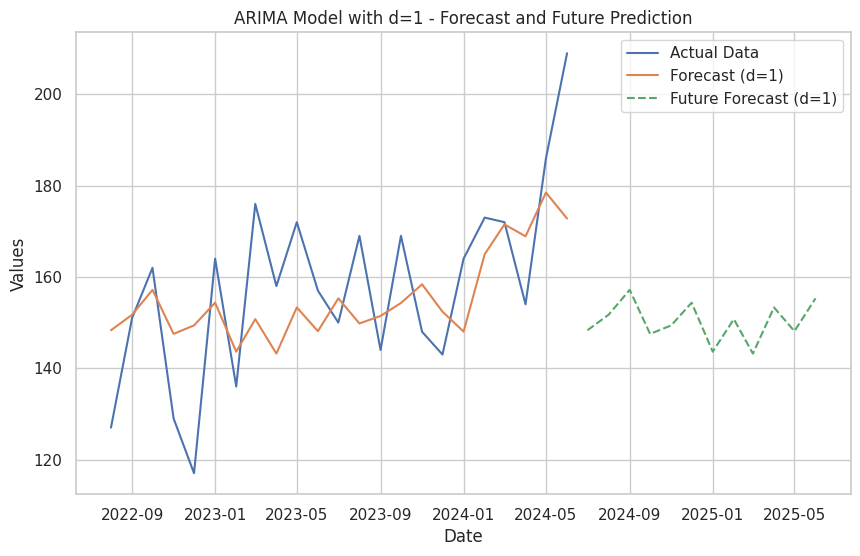



Model with d=1: 
MAE: 13.574107275547123
RMSE: 16.257981074156096

Plotting diagnostics for model with d=1:


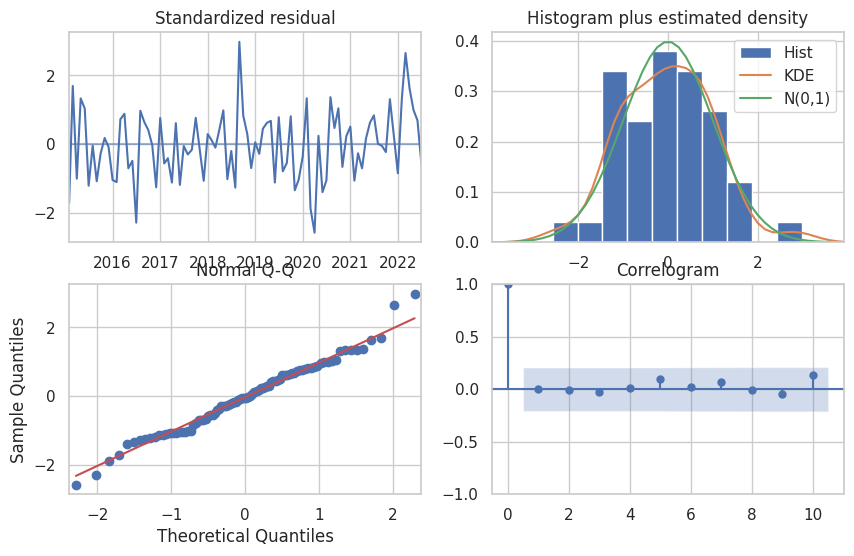

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=952.721, Time=0.69 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=957.193, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=890.828, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=889.971, Time=0.06 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=891.289, Time=0.14 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=889.674, Time=0.24 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=884.257, Time=0.48 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=882.501, Time=0.23 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=945.645, Time=0.23 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=859.504, Time=0.29 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=874.069, Time=0.14 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=861.352, Time=0.62 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=870.583, Time=0.35 sec
 ARIMA(3,2,0)(2,0,0)[12]             

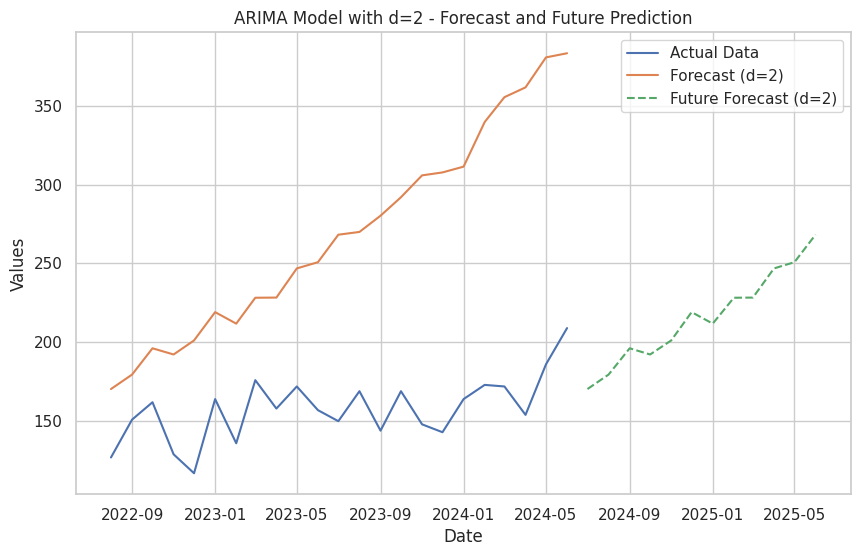



Model with d=2: 
MAE: 110.86914098732373
RMSE: 123.35960931958991

Plotting diagnostics for model with d=2:


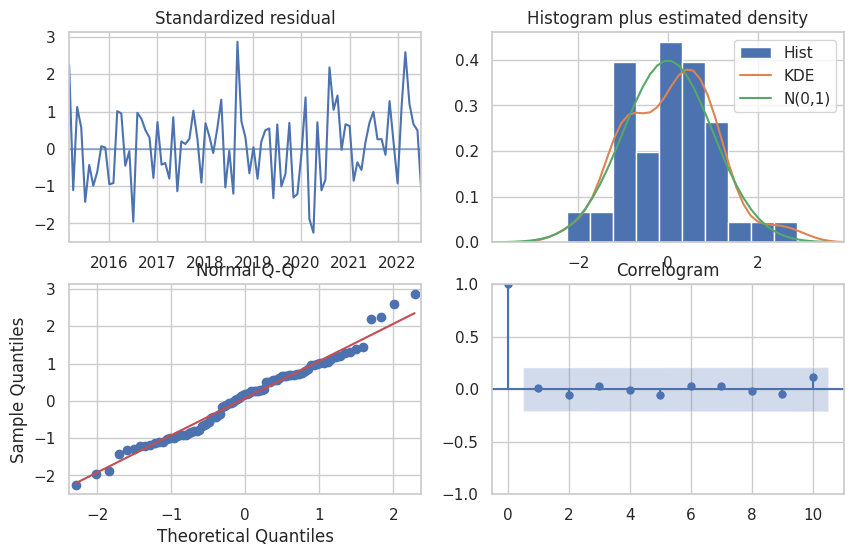

In [35]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the range of "d" values you want to test
d_values = [0, 1, 2]

# Store models and forecasts
models = {}
forecasts_dict = {}
future_forecasts_dict = {}

# Test data end date
test_data_end_date = pd.to_datetime('2024-06-01')

# looping over each "d" value
for d in d_values:
    # Fitting the ARIMA model with the current "d" value
    model =  pm.auto_arima(train_data, start_p=0, start_q=0,
                              max_p=10, max_q=10, # maximum p and q
                              d=d, # Differencing
                              seasonal=True,
                              m=12,
                              trace=True, # prints progress
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True) # TESTING

    # Storing models
    models[f'model_d_{d}'] = model

    # Make forecast using the model
    forecast = model.predict(n_periods=len(test_data))

    # Storing forecasts
    forecasts_dict[f'forecast_d_{d}'] = forecast

    # Storing 12-month future forecast FY25
    future_forecast = model.predict(n_periods=12)

    # Store future forecast
    future_forecasts_dict[f'future_forecast_d_{d}'] = future_forecast

    # Creating date range for future forecast from 2024-07 to 2025-06
    future_dates = pd.date_range(start=test_data_end_date + pd.DateOffset(months=1), periods=12, freq='MS')

    # Print the future forecast
    print(f'Future 12-month forecast for model with d={d}: {future_forecast}\n')

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data, label='Actual Data')
    plt.plot(test_data.index, forecast, label=f'Forecast (d={d})')
    plt.plot(future_dates, future_forecast, label=f'Future Forecast (d={d})', linestyle='--')
    plt.title(f'ARIMA Model with d={d} - Forecast and Future Prediction')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

    # Calculate MAE and RMSE
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))

    # Print the results for the current model
    print('\n')
    print(f'Model with d={d}: ')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}\n')

    # Plot diagnostics for the current ARIMA model
    print(f'Plotting diagnostics for model with d={d}:')
    model.plot_diagnostics(figsize=(10, 6))
    plt.show()

# Results of the Forecast:
Upon observation, we see that the model did not accurately predict the test set as it should have. In d=0,
we see that the predicted values were generally higher than the actual values, then dipped down when the actual values peaked. The future-forcasted did not continue from neither the actual or predicted values.
In d=1, we see that the predicted values were better in sync with the actual values, but also dipped down when the actual values peaked very high. The future-forcasted did not continue from neither the actual or predicted values. Interestingly enough, we notice that the MAE and RMSE are significantly lower than the other two models telling us that the d=1 model is a much better fit. Lastly, the d=2 model's predicted values were much higher than the actual data and performed the worst from the previous two models. Strangely, it appears that the future-forecast looks somewhat in sync with the actual data.
